In [202]:
import pandas as pd
import matplotlib.pyplot as plt


In [203]:
winmag_url = "https://gist.githubusercontent.com/clairehq/79acab35be50eaf1c383948ed3fd1129/raw/407a02139ae1e134992b90b4b2b8c329b3d73a6a/winemag-data-130k-v2.csv"

df_wine = pd.read_csv(winmag_url, engine='python')

In [204]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             65499 non-null  int64  
 1   country                65467 non-null  object 
 2   description            65499 non-null  object 
 3   designation            46588 non-null  object 
 4   points                 65499 non-null  int64  
 5   price                  60829 non-null  float64
 6   province               65467 non-null  object 
 7   region_1               54744 non-null  object 
 8   region_2               25170 non-null  object 
 9   taster_name            51856 non-null  object 
 10  taster_twitter_handle  49467 non-null  object 
 11  title                  65499 non-null  object 
 12  variety                65499 non-null  object 
 13  winery                 65499 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 7.0+

In [205]:
df_wine.describe()

,Unnamed: 0,points,price
count,65499.000000,65499.000000,60829.000000
mean,32749.000000,88.434037,35.232932
std,18908.076978,3.030310,39.477858
min,0.000000,80.000000,4.000000
25%,16374.500000,86.000000,17.000000
50%,32749.000000,88.000000,25.000000
75%,49123.500000,91.000000,42.000000
max,65498.000000,100.000000,2500.000000


In [206]:
df_wine.describe(include=object)

,country,description,designation,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
count,65467,65499,46588,65467,54744,25170,51856,49467,65499,65499,65499
unique,41,62824,24187,385,1111,17,19,15,62466,590,13549
top,US,"Cigar box, café au lait, and dried tobacco aro...",Reserve,California,Napa Valley,Central Coast,Roger Voss,@vossroger,Korbel NV Brut Sparkling (California),Pinot Noir,Wines & Winemakers
freq,27177,3,999,18122,2226,5420,13045,13045,6,6657,119


In [207]:
# 1._¿Cuantas variables tiene el dataframe? 
df_wine.shape[1]


14

In [208]:
# 2._¿Qué variables tienen valores perdidos? 
df_wine.columns[df_wine.isnull().any()].tolist()

['country',
 'designation',
 'price',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle']

In [221]:
# 3._¿Qué variables son numéricas? 
df_wine.select_dtypes(include=['number']).columns.tolist()

['Unnamed: 0', 'points', 'price']

In [220]:
# 4._¿Qué variables son cualitativas?
df_wine.select_dtypes(include=['object']).columns.tolist()

['country',
 'description',
 'designation',
 'province',
 'region_1',
 'region_2',
 'taster_name',
 'taster_twitter_handle',
 'title',
 'variety',
 'winery']

In [228]:
# 5._Hacer un dataframe con únicamente vinos europeos.
df_europa = df_wine[df_wine.country.isin(['France', 'Italy', 'Spain', 'Germany', 'Portugal', 'Austria', 'Greece', 'Romania', 'Croatia'])]
df_europa

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65486,65486,France,"Closed up and firm with a hint of vanilla, hon...",Domaine Long-Depaquit Les Bougnons Premier Cru,90,NaN,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Albert Bichot 2005 Domaine Long-Depaquit Les B...,Chardonnay,Albert Bichot
65491,65491,France,"A big, toasty wine, full of ripe, delicious fr...",Fourchaume Vieilles Vignes Premier Cru,90,36.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Pascal Bouchard 2006 Fourchaume Vieilles Vigne...,Chardonnay,Pascal Bouchard
65492,65492,France,"A rounded, fruity wine, packed with yellow pea...",Mont-de-Milieu Premier Cru,90,30.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,Simonnet-Febvre 2005 Mont-de-Milieu Premier Cr...,Chardonnay,Simonnet-Febvre
65494,65494,France,Made from young vines from the Vaulorent porti...,Fourchaume Premier Cru,90,45.0,Burgundy,Chablis,NaN,Roger Voss,@vossroger,William Fèvre 2005 Fourchaume Premier Cru (Ch...,Chardonnay,William Fèvre


In [212]:
# 6._¿Cuál es el menor, el mayor y el precio promedio de la botella por país? 

precio_resultado = df_wine.groupby('country')['price'].agg(['min', 'max', 'mean'])
print(precio_resultado)



                         min     max       mean
country                                        
Argentina                4.0   230.0  23.604663
Armenia                 14.0    14.0  14.000000
Australia                6.0   850.0  35.786701
Austria                  7.0   150.0  30.846774
Bosnia and Herzegovina  13.0    13.0  13.000000
Brazil                  10.0    45.0  23.185185
Bulgaria                 8.0    55.0  14.014706
Canada                  12.0   120.0  35.575472
Chile                    5.0   400.0  21.021544
Croatia                 13.0    65.0  25.000000
Cyprus                  11.0    21.0  16.000000
Czech Republic          15.0    45.0  23.666667
England                 25.0    80.0  51.636364
France                   5.0  2500.0  41.577949
Georgia                  9.0    40.0  18.270270
Germany                  5.0   775.0  40.592233
Greece                   8.0    79.0  21.845188
Hungary                 10.0   764.0  50.819672
India                   10.0    20.0  13

In [213]:
# 7._¿De que país es la botella de menor precio?

wine_min= df_wine[df_wine['price'] == min]
wine_min['country'].unique().tolist()



['Spain', 'US', 'Argentina']

<Axes: >

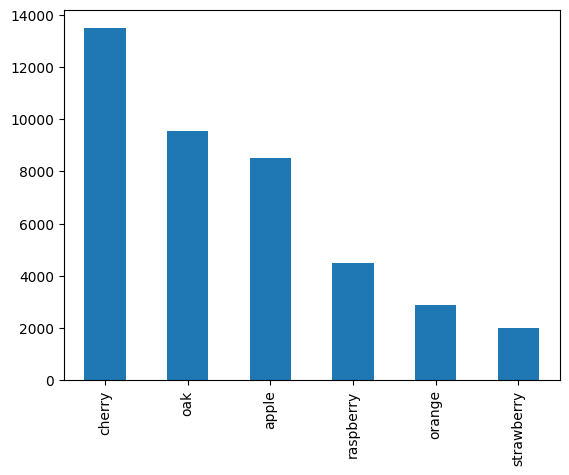

In [214]:
# 8._¿Cuantos vinos hay con *aroma a fresa* entre otras consideraciones snobs que vienen en la descripción?
consideraciones=['cherry', 'oak', 'apple','raspberry', 'orange', 'strawberry']
cont = []
for palabra in consideraciones:
    numero = len(df_wine[df_wine['description'].str.contains(palabra.lower())])
    cont.append(numero)


pd.Series(cont, index = consideraciones).plot(kind = 'bar')

In [215]:
# 9._¿Cuantas designaciones diferentes hay? ¿Cuál es la más repetida? ¿Cuantas veces se repite?
n_designaciones = df_wine['designation'].nunique()
print("Hay "+ str(n_designaciones) + " designaciones diferentes")
mas_repetida= df_wine['designation'].mode()[0]

cuantas_repeticion =df_wine['designation'].value_counts()[mas_repetida]
print("La designacion mas repetida es "+ mas_repetida + " y se repite " + str(cuantas_repeticion))

Hay 24187 designaciones diferentes
La designacion mas repetida es Reserve y se repite 999


In [216]:
# 10._Hacer un dataframe con la variedad, el país y el precio para vinos con un costo menor a los $20 dolares
df_vpp= df_wine.loc[df_wine.price< 20.0,['country', 'price', 'variety']]
df_vpp

,country,price,variety
1,Portugal,15.0,Portuguese Red
2,US,14.0,Pinot Gris
3,US,13.0,Riesling
5,Spain,15.0,Tempranillo-Merlot
6,Italy,16.0,Frappato
...,...,...,...
65456,US,11.0,Cabernet Sauvignon
65472,US,19.0,Chardonnay
65481,Argentina,11.0,Malbec
65482,Australia,17.0,Cabernet Sauvignon


In [217]:
# 11._¿Cuantos vinos diferentes de la variedad *Pinot Noir* hay por cada país?
df_PinotNoir= df_wine[df_wine['variety'] == 'Pinot Noir']
var_PinotPais=df_PinotNoir['country'].value_counts()
var_PinotPais

country
US              4918
France          1001
New Zealand      281
Chile            184
Australia         58
Austria           51
Argentina         46
Germany           31
South Africa      21
Bulgaria           9
Canada             8
Romania            8
Portugal           7
Spain              6
Israel             5
England            5
Italy              4
Uruguay            3
Slovenia           3
Switzerland        2
Brazil             2
Croatia            1
Name: count, dtype: int64